# Код написал в версии Python 3

In [2]:
# Импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [3]:
# Задаем распределение хи квадрат с 7 степенями свободы (k=7) 
chi2_rv=sts.chi2(7)
# Генерируем выборку объема 1000 наблюдений из заданного распределения
sample=chi2_rv.rvs(1000)

Text(0.5, 0, '$x$')

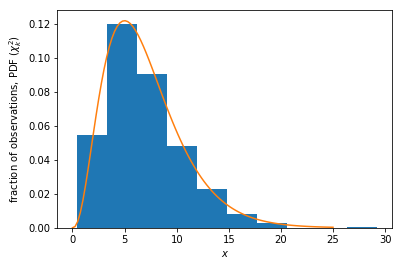

In [4]:
# Строим гистограмму полученной на предыдущем шаге выборки. Параметр normed в Python 3 заменен на density 
plt.hist(sample, density=True)
# Поверх гистограммы рисуем теоретическую плотность распределения хи квадрат
x = np.linspace(0,25,100)
pdf = chi2_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('fraction of observations, PDF ($\\chi^2_k$)')
plt.xlabel('$x$')

In [5]:
# Задаем массив значений n - кол-ва наблюдений в генерируемых выборках. 
n=[5,10,15,25,50]
# Задаем пустой массив list_sav. После каждого шага первого цикла будет создаваться новый элемент, 
# который будет представлять собой массив из средних значений для тысячи выборок с количеством наблюдений, равном n_i
# В итоге работы всего цикла получается массив из 5 элементов (в данном случае)
list_sav=[]
# Открываем цикл, где на каждом шаге будем перебирать значения из массива n
for n_i in n:
    # Задаем ещё один пустой массив sav. После каждого шага вложенного цикла будет создаваться элемент, 
    # который будет представлять собой среднее значение по выборке j с количеством наблюдений, равном n_i
    # В итоге работы вложенного цикла получается массив из 1000 элементов
    sav=[]
    # Открываем вложенный цикл, где на каждом шаге будем генерировать новую выборку с количеством наблюдений, равном n_i,
    # и рассчитывать выборочное среднее для этой выборки
    for j in range (0,1000):
        # Генерируем выборку j из распределения хи квадрат с количеством наблюдений n_i 
        sample_j=chi2_rv.rvs(n_i)
        # Переводим выборку j в датафрейм и рассчитываем выборочное среднее по этой выборке (sav_j)
        df=pd.DataFrame(sample_j, columns=['observation'])
        sav_j=df['observation'].mean()
        # Добавляем рассчитанное выборочное среднее sav_j в массив sav 
        sav.append(sav_j)
    # Полученный массив с выборочными средними по 1000 выборкам с кол-вом элементов n_i добавляем в массив list_sav. 
    list_sav.append(sav)

Теоретическое среднее для хи квадрат распределения равно числу степеней свободы k. 


Теоретическая дисперсия для хи квадрат распределения равно числу степеней свободы k, умноженному на 2

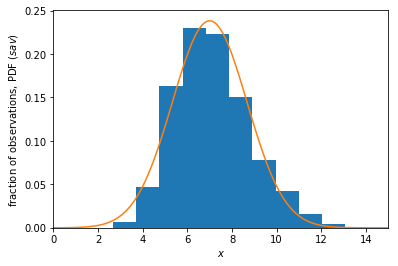

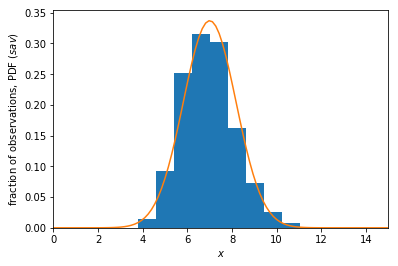

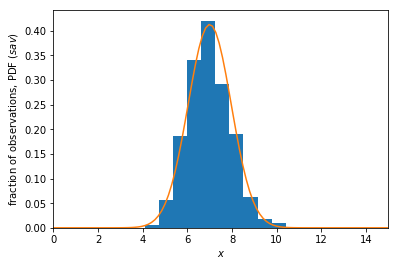

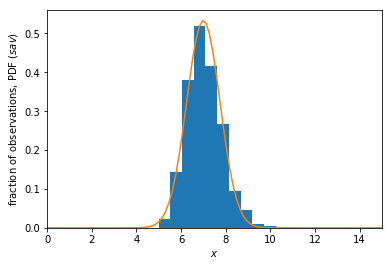

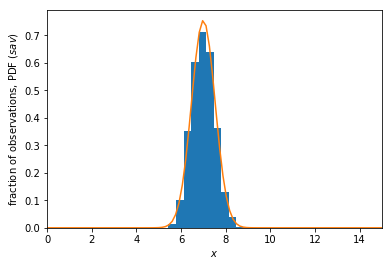

<Figure size 432x288 with 0 Axes>

In [6]:
EX=7
DX=2*7
# Задаем значения параметров нормальных распределений, которыми приближается распределение выборочных средних
mu=EX
sigmas = [np.sqrt(DX/n_i) for n_i in n]
# Открываем счетчик. Он нам нужен для перебора значений дисперсии, соответствующих выборкам с количеством наблюдений n_i
q=0
# Открываем цикл, где будем перебирать массивы с выборочными средними для выборок с кол-вом наблюдений n_i 
for sav in list_sav:
    # Рисуем для каждого массива гистограмму
    plt.hist(sav, density=True)
    plt.xlim(0,15)
    # Строим плотность нормального распределения для выборочных средних с параметрами mu и sigma 
    # (значение дисперсии берется из массива sigmas, элементы которого перебираются с помощью счетчика q)
    x = np.linspace(0,15,100)
    norm_rv = sts.norm(loc=mu, scale=sigmas[q])
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf)
    
    plt.ylabel('fraction of observations, PDF ($sav$)')
    plt.xlabel('$x$')
    plt.figure()
    
    q=q+1

### Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

1. C ростом количества наблюдений n в выборках эмпирический разброс средних значений уменьшается, т.е. чем больше становится выборка, тем ближе становятся выборочные средние к математическому ожиданию генеральной совокупности. То же самое происходит и с теоретической стандартной ошибкой среднего - она уменьшается.


2. Точноть аппроксимации распределения выборочных средних нормальным растет при росте количества наблюдений n в выборках. 